In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append("/Users/kai/Downloads/graduation/final_git/MasterThesis/src/")
from make_dataset import *
from config import *
from model import *
from data_prepare import *

In [89]:
model_name_list = ["bin2_BO_without_crop_best_model_val_version","bin2_BO_crop_100_best_model_val_version","bin2_BO_crop_80_best_model_val_version",
 "bin2_HB_without_crop_best_model_val_version","bin2_HB_crop_100_best_model_val_version","bin2_HB_crop_80_best_model_val_version",
 "default_model"]
crop_value = [120,100,80,120,100,80,100]
model_list,learning_rate = load_model_list(model_path,model_name_list)
new_model_list = []
for index in range(len(model_list)):
    config = model_list[index].get_config()
    new_model = keras.Sequential().from_config(config)
    new_model_list.append(new_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

In [2]:
data_list_k = ["20221116_Plate21","20230109_Plate521","20230111_Plate521","20230113_Plate521","20230111_Plate493"]
data_list_f = ["varying_lum_and_focus_train","varying_lum_and_focus_test"]
X_train_k, y_train_k, X_test_k , y_test_k = combine_dataset(data_list_k,2)
X_train_f, y_train_f, X_test_f , y_test_f = combine_dataset(data_list_f,1)
X_train = np.concatenate([X_train_k,X_train_f], axis=0)
X_test  = np.concatenate ([X_test_k ,X_test_f] , axis=0)
y_train = np.concatenate([y_train_k,y_train_f], axis=0)
y_test  = np.concatenate ([y_test_k ,y_test_f] , axis=0)

20221116_Plate21 (433, 120) (433, 1) (109, 120) (109, 1)
20230109_Plate521 (233, 120) (233, 1) (59, 120) (59, 1)
20230111_Plate521 (160, 120) (160, 1) (40, 120) (40, 1)
20230113_Plate521 (156, 120) (156, 1) (40, 120) (40, 1)
20230111_Plate493 (140, 120) (140, 1) (36, 120) (36, 1)
varying_lum_and_focus_train (1002, 120) (1002, 1) (251, 120) (251, 1)
varying_lum_and_focus_test (419, 120) (419, 1) (105, 120) (105, 1)


In [91]:
X_train.shape, y_train.shape, y_test.shape, y_test.shape

((2543, 120), (2543, 1), (640, 1), (640, 1))

In [1]:
%matplotlib widget
plt.hist(y_train,label="train")
plt.hist(y_test,label="test",alpha=0.6)
plt.legend()
plt.show()

NameError: name 'plt' is not defined

In [93]:
trained_model_list, history_list, evaluation_list = [],[],[]
for index in range(len(new_model_list)):
    model = new_model_list[index]
    lr = learning_rate[index]
    crop = crop_value[index]
    trained_model, historys, evaluations = evaluate_model(model, X_train, y_train, X_test,y_test,lr,crop,n_split = 3,shuffle=True,random_state=42)
    trained_model_list.append(trained_model)
    history_list.append(historys)
    evaluation_list.append(evaluations)

Epoch 1/60
339/339 [==============================] - 11s 30ms/step - loss: 6.0275 - mean_absolute_error: 1.7550 - val_loss: 14.5400 - val_mean_absolute_error: 3.0238
Epoch 2/60
339/339 [==============================] - 13s 40ms/step - loss: 3.3965 - mean_absolute_error: 1.3013 - val_loss: 3.2348 - val_mean_absolute_error: 1.2360
Epoch 3/60
339/339 [==============================] - 15s 44ms/step - loss: 3.3147 - mean_absolute_error: 1.2899 - val_loss: 2.7297 - val_mean_absolute_error: 1.1661
Epoch 4/60
339/339 [==============================] - 12s 37ms/step - loss: 2.9508 - mean_absolute_error: 1.1992 - val_loss: 2.7017 - val_mean_absolute_error: 1.1261
Epoch 5/60
339/339 [==============================] - 14s 40ms/step - loss: 3.0259 - mean_absolute_error: 1.2062 - val_loss: 2.5118 - val_mean_absolute_error: 1.1260
Epoch 6/60
339/339 [==============================] - 14s 42ms/step - loss: 2.7436 - mean_absolute_error: 1.1611 - val_loss: 2.3715 - val_mean_absolute_error: 1.0433
Epo

In [96]:
import matplotlib.pyplot as plt
for index in range(len(evaluation_list)):
    acc = np.mean(np.array(evaluation_list[index]),axis=0)[1]
    print(acc,model_name_list[index])

0.8029552698135376 bin2_BO_without_crop_best_model_val_version
0.7824010451634725 bin2_BO_crop_100_best_model_val_version
0.8813070853551229 bin2_BO_crop_80_best_model_val_version
1.2597335577011108 bin2_HB_without_crop_best_model_val_version
0.9337584972381592 bin2_HB_crop_100_best_model_val_version
0.9070558150609335 bin2_HB_crop_80_best_model_val_version
1.0301923354466755 default_model


In [ ]:
model_name_list = ["bin2_BO_without_crop_best_model_val_version","bin2_BO_crop_100_best_model_val_version","bin2_BO_crop_80_best_model_val_version",
 "bin2_HB_without_crop_best_model_val_version","bin2_HB_crop_100_best_model_val_version","bin2_HB_crop_80_best_model_val_version",
 "default_model","bin2_BO_crop_100_best_model_val_version_whole_data", "bin2_HB_crop_80_best_model_val_version_whole_data"]
crop_value = [120,100,80,120,100,80,100,100,80]

In [97]:
# len(y_test) * 0.05 = 30
MAE = statistic_evaluate(trained_model_list,X_test,y_test,crop_value,statistic_type="MAE",n_iterations=1000,n_samples=30)

Text(0.5, 0, 'MAE')

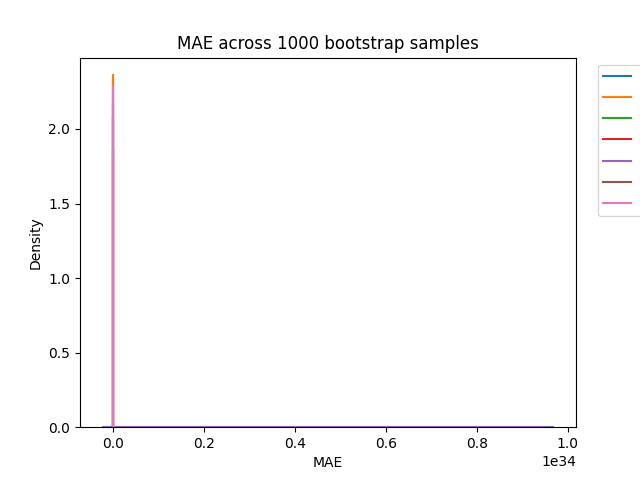

In [99]:
%matplotlib widget
import seaborn as sns
for i in range(len(model_name_list)):
    sns.kdeplot(MAE[i],label=model_name_list[i])

plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title("MAE across 1000 bootstrap samples")
plt.xlabel("MAE")
plt.savefig(main_path+"/notebook/plot_data/compare_model/20230202 MAE new_trained vs hp.png", bbox_inches='tight')
plt.clf()

In [100]:
RE = statistic_evaluate(trained_model_list,X_test,y_test,crop_value,statistic_type="RE",n_iterations=1000,n_samples=30)

/home/ipausers/lin/Desktop/Kai/Graduation-Project/models/model.py:275: RuntimeWarning: divide by zero encountered in divide
  acc = np.mean(abs(model_list[index].predict(X_bs_input,verbose=0)-y_bs)/y_bs)


Text(0.5, 0, 'Relative Error')

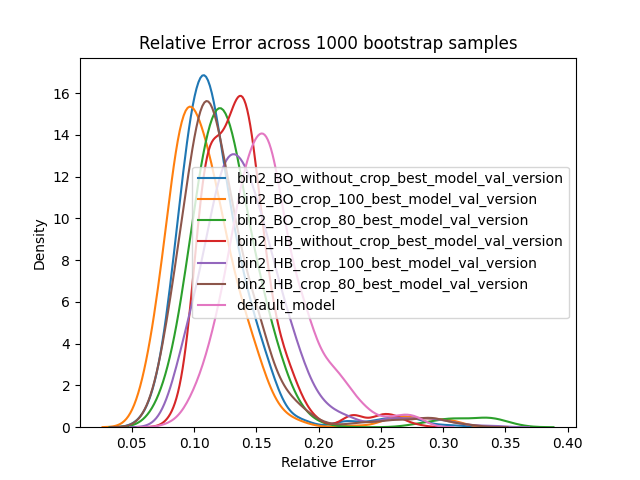

In [101]:
%matplotlib widget
for i in range(len(model_name_list)):
    sns.kdeplot(RE[i],label=model_name_list[i])

plt.title("Relative Error across 1000 bootstrap samples")
plt.xlabel("Relative Error")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.savefig(main_path+"/notebook/plot_data/compare_model/20230202 RE new_trained vs hp.png", bbox_inches='tight')
plt.clf()

In [ ]:
ME = statistic_evaluate(trained_model_list,X_test,y_test,crop_value,statistic_type="ME",n_iterations=1000,n_samples=30)

In [ ]:
%matplotlib widget
for i in range(len(model_name_list)):
    sns.kdeplot(ME[i],label=model_name_list[i])
    
plt.title("Mean Error across 1000 bootstrap samples")
plt.axvline(0,linestyle="--")
plt.xlabel("Mean Error")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.savefig(main_path+"/notebook/plot_data/compare_model/20230202 ME new_trained vs hp.png", bbox_inches='tight')
plt.clf()

In [3]:
%matplotlib widget
j= 7
for i in range(len(data_list_k)):
    plot_seperate_dataset(trained_model_list[j],data_list_k[i],2,crop_value[j])

    
for i in range(len(data_list_f)):
    plot_seperate_dataset(trained_model_list[j],data_list_f[i],1,crop_value[j])


plt.plot([0,18],[0,18])
plt.xlabel("predict width")
plt.ylabel("actual width")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title(model_name_list[j])
plt.savefig(main_path+"/notebook/plot_data/compare_model/20230202 check seperate HB 80 hp (whole).png", bbox_inches='tight')
plt.clf()

NameError: name 'data_list_k' is not defined

4/4 [==============================] - 0s 8ms/step


Text(0.5, 1.0, 'bin2_HB_crop_80_best_model_val_version')

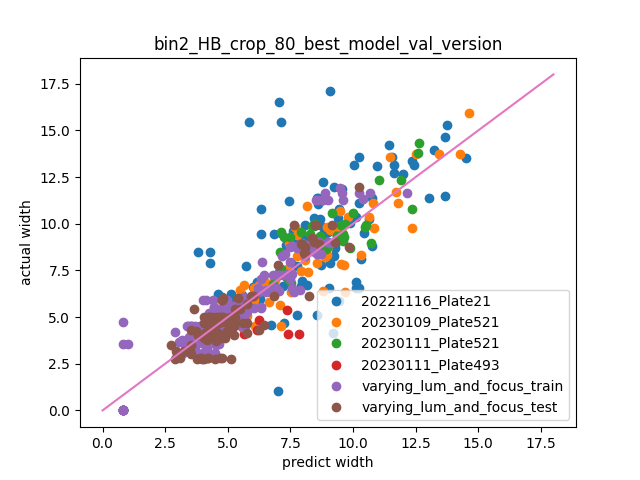

In [86]:
%matplotlib widget
j= 5
for i in range(len(data_list_k)):
    plot_seperate_dataset(trained_model_list[j],data_list_k[i],2,crop_value[j])
for i in range(len(data_list_f)):
    plot_seperate_dataset(trained_model_list[j],data_list_f[i],1,crop_value[j])
plt.plot([0,18],[0,18])
plt.xlabel("predict width")
plt.ylabel("actual width")
plt.legend()
plt.title(model_name_list[j])

4/4 [==============================] - 0s 940us/step


Text(0.5, 1.0, 'default_model')

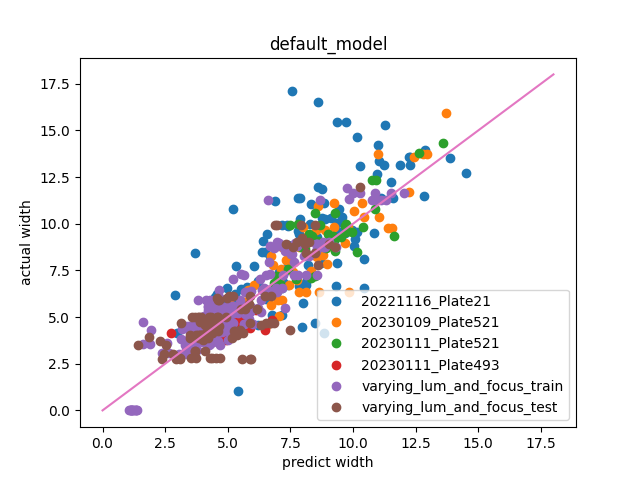

In [87]:
%matplotlib widget
j= 6
for i in range(len(data_list_k)):
    plot_seperate_dataset(trained_model_list[j],data_list_k[i],2,crop_value[j])
for i in range(len(data_list_f)):
    plot_seperate_dataset(trained_model_list[j],data_list_f[i],1,crop_value[j])
plt.plot([0,18],[0,18])
plt.xlabel("predict width")
plt.ylabel("actual width")
plt.legend()
plt.title(model_name_list[j])

In [28]:
def load_model_list(model_path,model_list):
    from keras import backend
    output, learning_rate=[], []
    for model_name in model_list:
        model = load_model(model_path,model_name)
        output.append(model)
        learning_rate.append(backend.get_value(model.optimizer.lr))
    return output, learning_rate

def combine_dataset(data_list,value_size=1):
    X_train_list, y_train_list = [],[]
    X_test_list , y_test_list  = [],[]
    for dataset in data_list:
        X, y = data(dataset)
        y = y * value_size
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)
        X_train_list.extend(X_train), y_train_list.extend(y_train)
        X_test_list.extend(X_test), y_test_list.extend(y_test)
        print(f"{dataset}",X_train.shape, y_train.shape, X_test.shape , y_test.shape)
    X_train_list, y_train_list, X_test_list , y_test_list = np.array(X_train_list), np.array(y_train_list), np.array(X_test_list) , np.array(y_test_list)
    return X_train_list, y_train_list, X_test_list , y_test_list


from sklearn.utils import resample
import matplotlib.pyplot as plt
def statistic_evaluate(model_list, X_test,y_test,crop_list,statistic_type="MAE",n_iterations=1000,n_samples=50):
    acc_list = []
    counter = 0
    for index in range(len(model_list)):
        acc_list.append([])
    for _ in range(n_iterations):
        X_bs, y_bs = resample(X_test, y_test, replace=True,n_samples=n_samples)
        if 0 in y_bs:
            counter += 1
        for index in range(len(model_list)):
            crop_size = crop_list[index]
            X_bs_input = data_preparation(X_bs,crop_size)
            if statistic_type=="MAE":
                loss, acc = model_list[index].evaluate(X_bs_input, y_bs, verbose=0)
                acc_list[index].append(acc)
            if statistic_type=="RE":
                if 0 not in y_bs:
                    acc = np.mean(abs(model_list[index].predict(X_bs_input,verbose=0)-y_bs)/y_bs)
                    acc_list[index].append(acc)
            if statistic_type=="ME":
                acc = np.mean(model_list[index].predict(X_bs_input,verbose=0)-y_bs)
                acc_list[index].append(acc)
    if statistic_type=="RE":
        print(f"Get {counter} time(s) 0 in label, so it will not include in the output.")
    else:
        print(f"Get {counter} time(s) 0 in label.")
    return np.array(acc_list)

def plot_seperate_dataset(model,dataset:str,value_size:int,crop_value:int):
    X, y = data(dataset)
    y = y * value_size
    X_train_iter, X_test_iter, y_train_iter, y_test_iter = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    X_test = data_preparation(X_test_iter,crop_value)
    plt.plot(model.predict(X_test), y_test_iter,"o",label = dataset)
    return plt

def evaluate_model(model, X, y, X_test,y_test,learning_rate_value=0.001,crop_size=100,n_split=3,n_repeat=3,random_state=42):
    evaluations = []
    historys = []
    kf = RepeatedKFold(n_splits=n_split,n_repeats=n_repeat,random_state=random_state)
    for (train_index, val_index) in kf.split(X):
        train_feature = X[train_index]
        train_label   = y[train_index]
        val_feature  = X[val_index]
        val_label    = y[val_index]
        model.compile(
            optimizer=keras.optimizers.Adam(learning_rate=learning_rate_value),
            loss="mean_squared_error",
            metrics="mean_absolute_error")
        history = model.fit(
                        x=data_aug(train_feature,crop_size),
                        y=train_label,
                        epochs=60,
                        batch_size=5,
                        verbose=1,
                        validation_data=(data_preparation(val_feature,crop_size), val_label))
        evaluate = model.evaluate(data_preparation(X_test,crop_size), y_test)
        evaluations.append(evaluate)
        historys.append(history)
    return model,historys,evaluations

In [2]:
model_path = "/home/ipausers/lin/Desktop/Kai/Graduation-Project/models"
model_name_list = ["bin2_BO_without_crop_best_model_val_version","bin2_BO_crop_100_best_model_val_version","bin2_HB_crop_80_best_model_val_version", "default_model"]
crop_value = [120,100,80,100]
model_list,learning_rate = load_model_list(model_path,model_name_list)
new_model_list = []
for index in range(len(model_list)):
    config = model_list[index].get_config()
    new_model = keras.Sequential().from_config(config)
    new_model_list.append(new_model)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

In [3]:
import tensorflow as tf
X_train,y_train = data("combine_width_train")
X_test,y_test = data("combine_width_test")
trained_model_list, history_list, evaluation_list = [],[],[]
for index in range(len(new_model_list)):
    model = new_model_list[index]
    lr = learning_rate[index]
    crop = crop_value[index]
    trained_model, historys, evaluations = evaluate_model(model, X_train, y_train, X_test,y_test,lr,crop,n_split = 3,random_state=42)
    trained_model_list.append(trained_model)
    history_list.append(historys)
    evaluation_list.append(evaluations)

new
Epoch 1/60
339/339 [==============================] - 9s 25ms/step - loss: 5.7271 - mean_absolute_error: 1.7379 - val_loss: 19.6580 - val_mean_absolute_error: 3.7511
Epoch 2/60
339/339 [==============================] - 8s 25ms/step - loss: 3.5591 - mean_absolute_error: 1.3499 - val_loss: 4.7467 - val_mean_absolute_error: 1.5277
Epoch 3/60
339/339 [==============================] - 8s 25ms/step - loss: 3.1880 - mean_absolute_error: 1.2556 - val_loss: 4.6091 - val_mean_absolute_error: 1.6827
Epoch 4/60
339/339 [==============================] - 8s 25ms/step - loss: 3.1550 - mean_absolute_error: 1.2404 - val_loss: 2.9193 - val_mean_absolute_error: 1.1988
Epoch 5/60
339/339 [==============================] - 8s 25ms/step - loss: 2.8292 - mean_absolute_error: 1.1960 - val_loss: 2.8457 - val_mean_absolute_error: 1.1608
Epoch 6/60
339/339 [==============================] - 8s 25ms/step - loss: 2.8130 - mean_absolute_error: 1.1725 - val_loss: 2.9133 - val_mean_absolute_error: 1.1809
Epoch

In [4]:
MAE = statistic_evaluate(trained_model_list,X_test,y_test,crop_value,statistic_type="MAE",n_iterations=1000,n_samples=30)

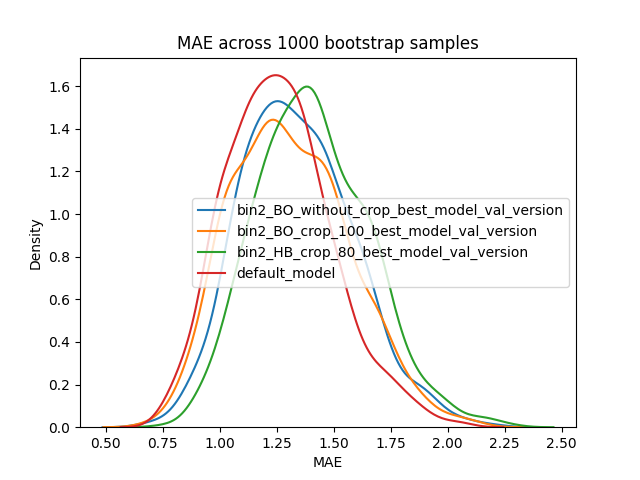

In [12]:
%matplotlib widget
import seaborn as sns
for i in range(len(model_name_list)):
    sns.kdeplot(MAE[i],label=model_name_list[i])

plt.title("MAE across 1000 bootstrap samples")
plt.xlabel("MAE")
plt.legend()
plt.show()
# plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
# plt.savefig(main_path+"/notebook/plot_data/compare_model/20230202 MAE new_trained vs hp.png", bbox_inches='tight')

In [30]:
RE = statistic_evaluate(trained_model_list,X_test,y_test,crop_value,statistic_type="RE",n_iterations=1000,n_samples=30)

NameError: name 'trained_model_list' is not defined

In [29]:
%matplotlib widget
for i in range(len(model_name_list)):
    sns.kdeplot(RE[i],label=model_name_list[i])

plt.title("Relative Error across 1000 bootstrap samples")
plt.xlabel("Relative Error")
plt.legend()
# plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
# plt.savefig(main_path+"/notebook/plot_data/compare_model/20230202 RE new_trained vs hp.png", bbox_inches='tight')
plt.show()

NameError: name 'model_name_list' is not defined

In [8]:
ME = statistic_evaluate(trained_model_list,X_test,y_test,crop_value,statistic_type="ME",n_iterations=1000,n_samples=30)

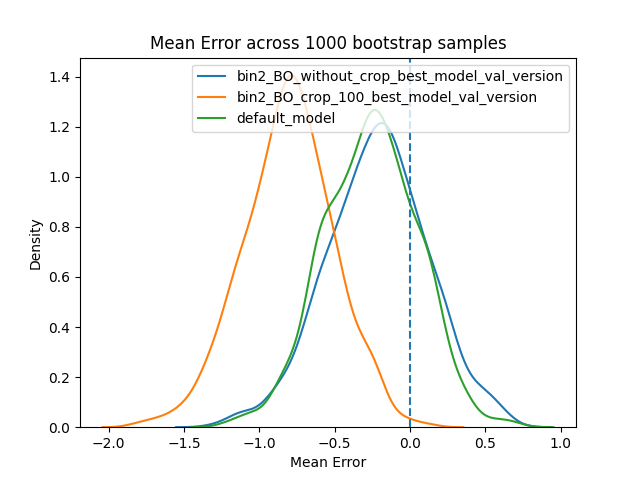

In [23]:
%matplotlib widget
for i in [0,1,3]:
    sns.kdeplot(ME[i],label=model_name_list[i])
plt.title("Mean Error across 1000 bootstrap samples")
plt.axvline(0,linestyle="--")
plt.xlabel("Mean Error")
plt.legend()
plt.show()
# plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
# plt.savefig(main_path+"/notebook/plot_data/compare_model/20230202 ME new_trained random crop random brightness randomflip.png", bbox_inches='tight')

In [5]:
import numpy as np
data_list_k = ["20221116_Plate21","20230109_Plate521","20230111_Plate521","20230113_Plate521","20230111_Plate493"]
data_list_f = ["varying_lum_and_focus_train","varying_lum_and_focus_test"]
X_train_k, y_train_k, X_test_k , y_test_k = combine_dataset(data_list_k,2)
X_train_f, y_train_f, X_test_f , y_test_f = combine_dataset(data_list_f,1)
X_train = np.concatenate([X_train_k,X_train_f], axis=0)
X_test = np.concatenate ([X_test_k ,X_test_f] , axis=0)
y_train = np.concatenate([y_train_k,y_train_f], axis=0)
y_test = np.concatenate ([y_test_k ,y_test_f] , axis=0)

20221116_Plate21 (433, 120) (433, 1) (109, 120) (109, 1)
20230109_Plate521 (233, 120) (233, 1) (59, 120) (59, 1)
20230111_Plate521 (160, 120) (160, 1) (40, 120) (40, 1)
20230113_Plate521 (156, 120) (156, 1) (40, 120) (40, 1)
20230111_Plate493 (140, 120) (140, 1) (36, 120) (36, 1)
varying_lum_and_focus_train (1002, 120) (1002, 1) (251, 120) (251, 1)
varying_lum_and_focus_test (419, 120) (419, 1) (105, 120) (105, 1)


4/4 [==============================] - 0s 1ms/step


Text(0.5, 1.0, 'default_model')

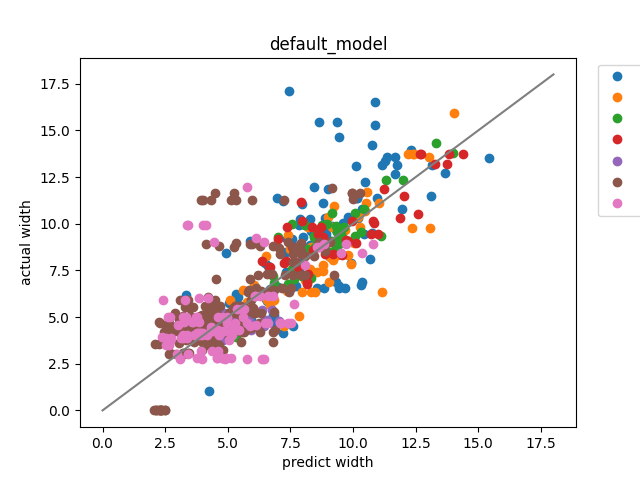

In [39]:
%matplotlib widget
j= 3
for i in range(len(data_list_k)):
    plot_seperate_dataset(trained_model_list[j],data_list_k[i],2,crop_value[j])
for i in range(len(data_list_f)):
    plot_seperate_dataset(trained_model_list[j],data_list_f[i],1,crop_value[j])
plt.plot([0,18],[0,18])
plt.xlabel("predict width")
plt.ylabel("actual width")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title(model_name_list[j])
# plt.savefig(main_path+"/notebook/plot_data/compare_model/20230202 check seperate HB random crop 80 random brightness random flip.png", bbox_inches='tight')
# plt.clf()

4/4 [==============================] - 0s 6ms/step


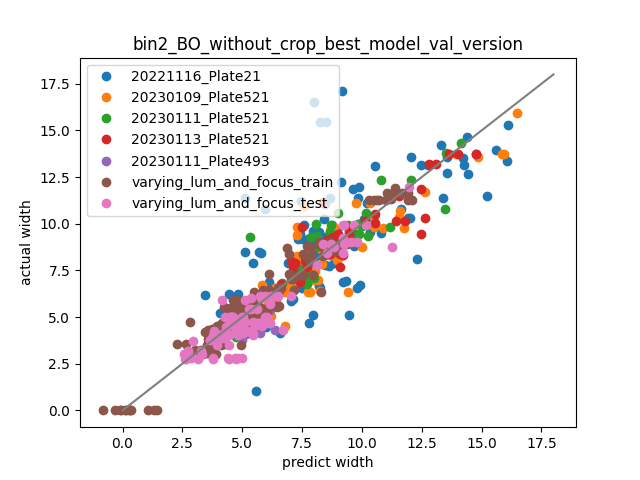

In [45]:
%matplotlib widget
j= 0
for i in range(len(data_list_k)):
    plot_seperate_dataset(latest,data_list_k[i],2,crop_value[j])
for i in range(len(data_list_f)):
    plot_seperate_dataset(latest,data_list_f[i],1,crop_value[j])
plt.plot([0,18],[0,18])
plt.xlabel("predict width")
plt.ylabel("actual width")
# plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title(model_name_list[j])
plt.legend()

(array([ 13.,  28., 213., 128.,  70., 109.,  44.,  17.,  13.,   5.]),
 array([ 0.        ,  1.70922506,  3.41845012,  5.12767517,  6.83690023,
         8.54612529, 10.25535035, 11.9645754 , 13.67380046, 15.38302552,
        17.09225058]),
 <BarContainer object of 10 artists>)

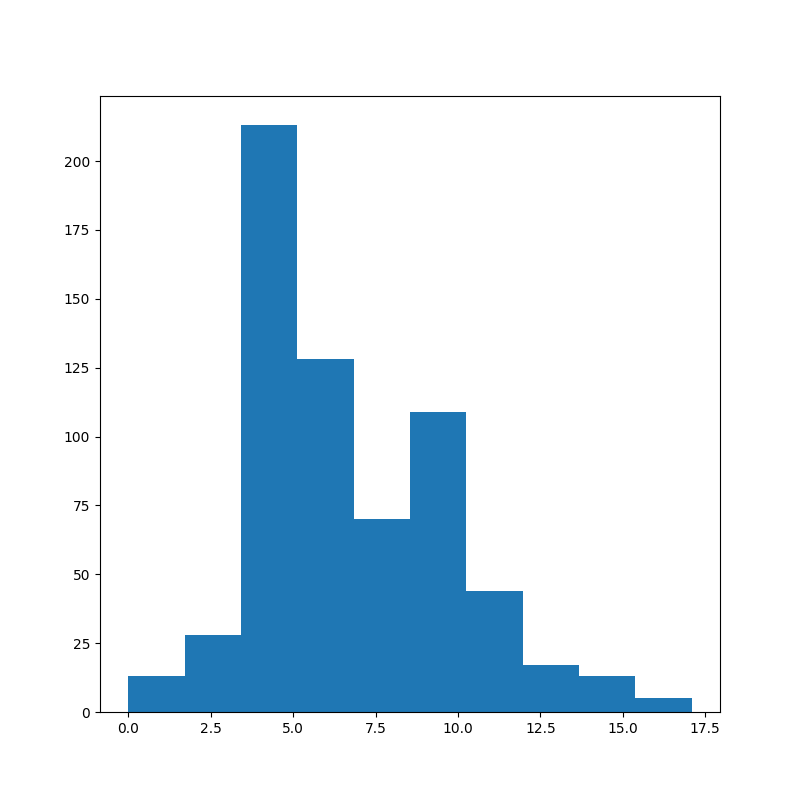

In [58]:
%matplotlib widget
plt.figure(figsize=(8, 8))
plt.hist(y_test)

In [3]:
latest = load_model(model_path,"BO_without_crop_best_model")
old = load_model(model_path,"bin2_BO_crop_100_best_model_val_version_whole_data")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

4/4 [==============================] - 0s 6ms/step


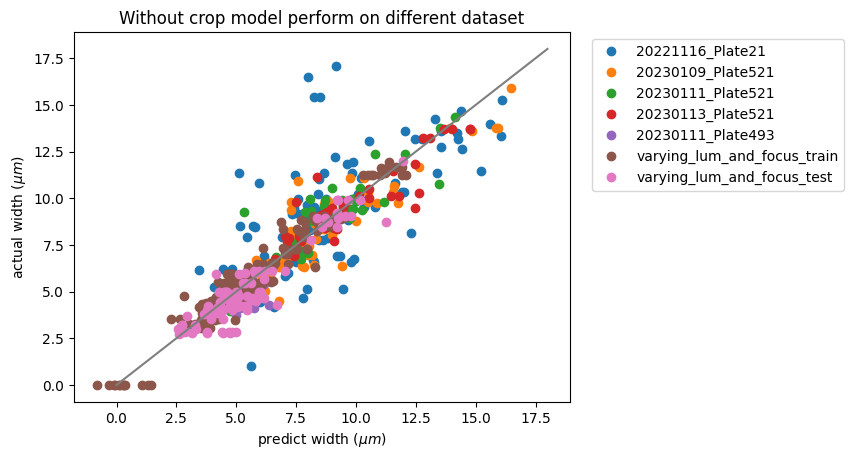

In [10]:
j= 0
crop_value = [120,100]
for i in range(len(data_list_k)):
    plot_seperate_dataset(latest,data_list_k[i],2,crop_value[j])
for i in range(len(data_list_f)):
    plot_seperate_dataset(latest,data_list_f[i],1,crop_value[j])
plt.plot([0,18],[0,18])
plt.xlabel("predict width ($\mathit{\mu m}$)")
plt.ylabel("actual width ($\mathit{\mu m}$)")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title("Without crop model perform on different dataset")
plt.savefig(main_path+"/notebook/plot_data/compare_model/Without crop model.png", bbox_inches='tight')

4/4 [==============================] - 0s 6ms/step


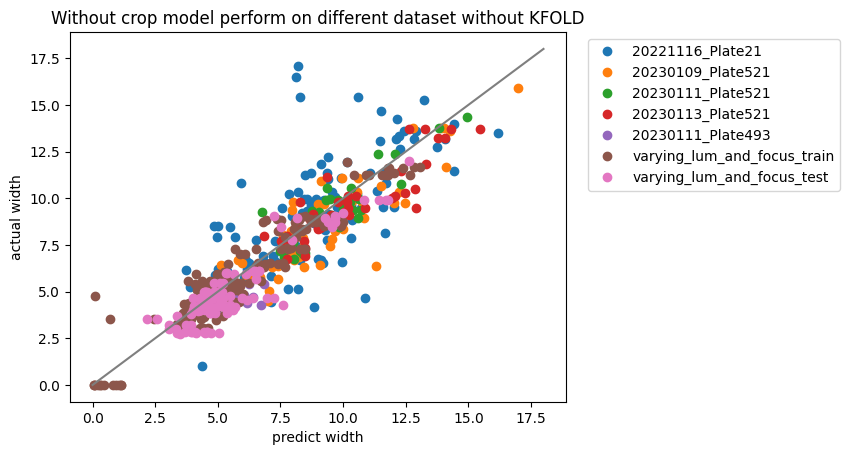

In [11]:
j= 1
crop_value = [120,100]
for i in range(len(data_list_k)):
    plot_seperate_dataset(old,data_list_k[i],2,crop_value[j])
for i in range(len(data_list_f)):
    plot_seperate_dataset(old,data_list_f[i],1,crop_value[j])
plt.plot([0,18],[0,18])
plt.xlabel("predict width")
plt.ylabel("actual width")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.title("Without crop model perform on different dataset without KFOLD")
plt.savefig(main_path+"/notebook/plot_data/compare_model/Without crop model without KFOLD.png", bbox_inches='tight')

In [12]:
ME = statistic_evaluate([latest,old],X_test,y_test,crop_value,statistic_type="ME",n_iterations=1000,n_samples=30)

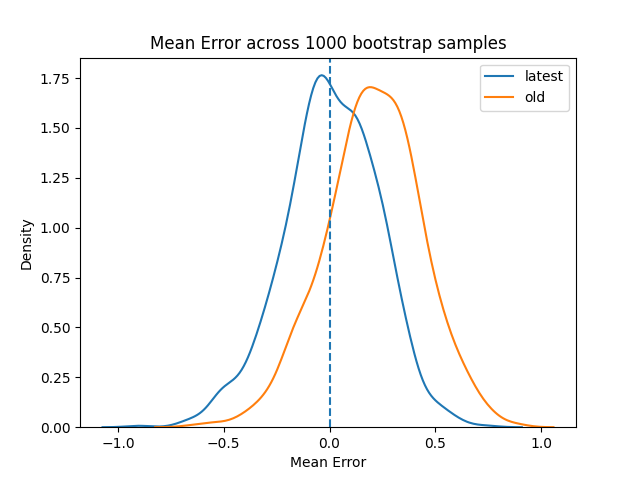

In [14]:
%matplotlib widget
import seaborn as sns
for i in range(2):
    sns.kdeplot(ME[i],label=["latest","old"][i])
    
plt.title("Mean Error across 1000 bootstrap samples")
plt.axvline(0,linestyle="--")
plt.xlabel("Mean Error")
# plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.legend()

In [15]:
MAE = statistic_evaluate([latest,old],X_test,y_test,crop_value,statistic_type="MAE",n_iterations=1000,n_samples=30)
%matplotlib widget
import seaborn as sns
for i in range(len(model_name_list)):
    sns.kdeplot(MAE[i],label=["latest","old"][i])
plt.title("MAE across 1000 bootstrap samples")
plt.xlabel("MAE")
plt.legend()
plt.show()

NameError: name 'model_name_list' is not defined

# Check the feature that do not perform well

In [ ]:
model = load_model(model_path,"BO_without_crop_best_model")
X,y = data("combine_width_test")

In [ ]:
np.where(y < 15)

In [ ]:
i=65
plt.plot(X[i],label = f"P:{np.around(model.predict(np.expand_dims(X[i], axis=0))[0],1)}; G:{np.around(y[i][0],1)[0]}")
i=107
plt.plot(X[i],label = f"P:{np.around(model.predict(np.expand_dims(X[i], axis=0))[0],1)}; G:{np.around(y[i][0],1)[0]}")
i=136
plt.plot(X[i],label = f"P:{np.around(model.predict(np.expand_dims(X[i], axis=0))[0],1)}; G:{np.around(y[i][0],1)[0]}")
plt.legend()
plt.title("The actual width higher than 15")
path = os.path.join(main_path,"notebook/plot_data/Bias","Bias of the feature Higher.png")
plt.savefig(path,bbox_inches="tight")
plt.clf()

In [ ]:
np.where(y < 2.5)

In [ ]:
i=83
plt.plot(X[i],label = f"P:{np.around(model.predict(np.expand_dims(X[i], axis=0))[0],1)}; G:{np.around(y[i][0],1)[0]}")
i=297
plt.plot(X[i],label = f"P:{np.around(model.predict(np.expand_dims(X[i], axis=0))[0],1)}; G:{np.around(y[i][0],1)[0]}")
i=529
plt.plot(X[i],label = f"P:{np.around(model.predict(np.expand_dims(X[i], axis=0))[0],1)}; G:{np.around(y[i][0],1)[0]}")
plt.legend()
plt.title("The actual width lower than 2.5")
path = os.path.join(main_path,"notebook/plot_data/Bias","Bias of the feature Lower.png")
plt.savefig(path,bbox_inches="tight")
plt.clf()

# Get the boostrapping for the best 3 model.

In [2]:
latest = load_model(model_path,"BO_without_crop_best_model")
old = load_model(model_path,"bin2_BO_crop_100_best_model_val_version")
default = load_model(model_path,"default_model")
X,y = data("combine_width_test")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

In [21]:
MAE = statistic_evaluate([latest,old,default],X,y,[120,100,100],statistic_type="MAE",n_iterations=1000,n_samples=30)

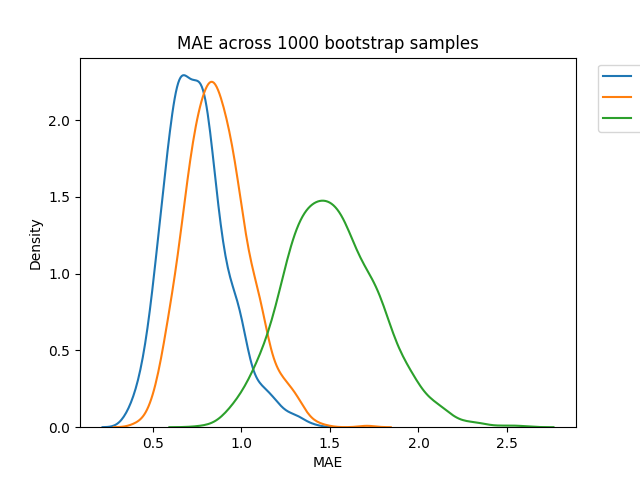

In [25]:
%matplotlib widget
import seaborn as sns
for i in range(3):
    sns.kdeplot(MAE[i],label=["without crop","crop to 100","Felix"][i])
plt.title("MAE across 1000 bootstrap samples")
plt.xlabel("MAE")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.savefig(main_path+"/notebook/plot_data/compare_model/20230220 MAE presentation 120-100-felix.png", bbox_inches='tight')

In [42]:
RE = statistic_evaluate_new([latest,old,default],X,label,[120,100,100],statistic_type="RE",n_iterations=1000,n_samples=30)

Get 442 time(s) 0 in label, so it will not include in the output.


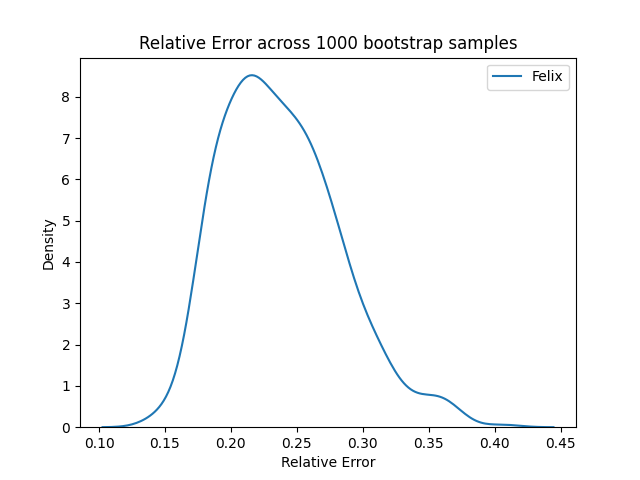

In [46]:
%matplotlib widget
import seaborn as sns
for i in range(3):
    sns.kdeplot(RE[i],label=["without crop","crop to 100","Felix"][i])
sns.kdeplot(RE[i],label=["without crop","crop to 100","Felix"][i])
plt.title("Relative Error across 1000 bootstrap samples")
plt.xlabel("Relative Error")
plt.legend()
# plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
# plt.savefig(main_path+"/notebook/plot_data/compare_model/20230220 RE presentation 120-100-felix.png", bbox_inches='tight')

In [35]:
ME = statistic_evaluate([latest,old,default],X,y,[120,100,100],statistic_type="ME",n_iterations=1000,n_samples=30)

Get 446 time(s) 0 in label.


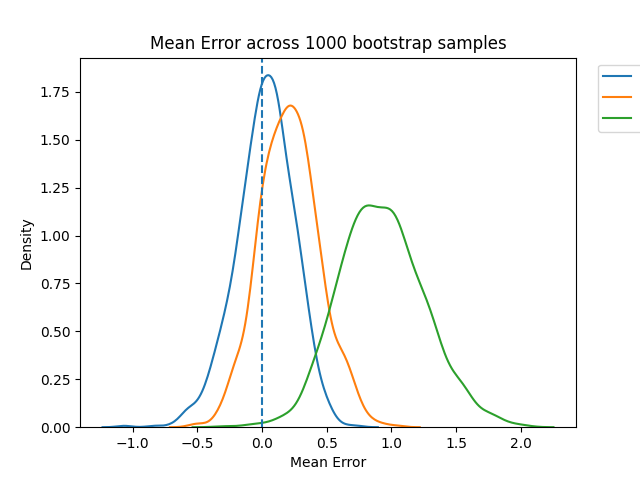

In [37]:
%matplotlib widget
for i in range(3):
    sns.kdeplot(ME[i],label=["without crop","crop to 100","Felix"][i])
plt.title("Mean Error across 1000 bootstrap samples")
plt.axvline(0,linestyle="--")
plt.xlabel("Mean Error")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
plt.savefig(main_path+"/notebook/plot_data/compare_model/20230220 ME presentation 120-100-felix.png", bbox_inches='tight')